In [3]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [4]:
metric_file_name = 'Logs/Load2/metric_rt_threshold200_500.log'

In [5]:
df = pd.read_csv(metric_file_name, sep=',', header=0)

In [6]:
df.head()

,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,15:04:4,2299.79195,860.543176,1,6.8,80.1,18.0,82.0,80.6,17.5,...,230795.6,1232452.4,0.0,1136870.0,100.0,35.0,35.0,34.7,35.0,34.6
1,15:04:5,2949.97715,1479.373516,2,12.2,83.4,15.0,85.0,83.7,14.6,...,224834.8,1216676.8,0.0,1058562.0,100.0,28.9,28.9,28.7,28.9,28.4
2,15:05:0,1532.96170,669.348902,3,18.4,71.6,26.7,73.3,72.1,26.9,...,229126.4,1221143.2,0.0,1222702.0,100.0,24.4,24.4,27.0,24.4,27.0
3,15:05:1,285.87160,179.640909,4,19.8,72.9,25.7,74.2,72.9,24.6,...,232623.6,1217169.2,0.0,1090541.6,100.0,21.4,21.4,24.1,21.4,23.8
4,15:05:2,318.91380,211.467929,3,19.8,84.0,13.7,86.3,85.0,13.4,...,232646.0,1219428.0,0.0,1090547.6,100.0,22.0,22.0,27.5,22.0,27.6


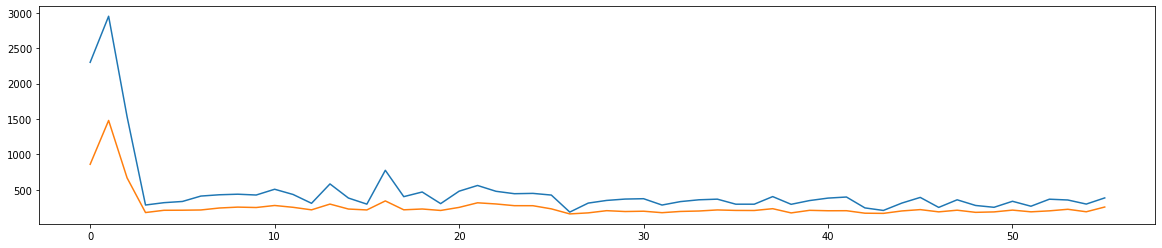

In [7]:
plt.figure(figsize=(20,4))
plt.plot(df[' response_time_p95'])
plt.plot(df[' response_time'])
plt.show()

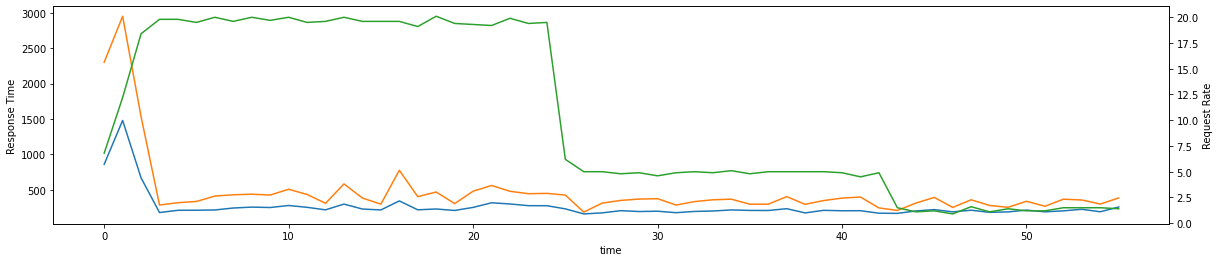

In [8]:

fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df[' response_time'], color = 'C0')
ax1.plot(df[' response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df[' request_rate'], color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

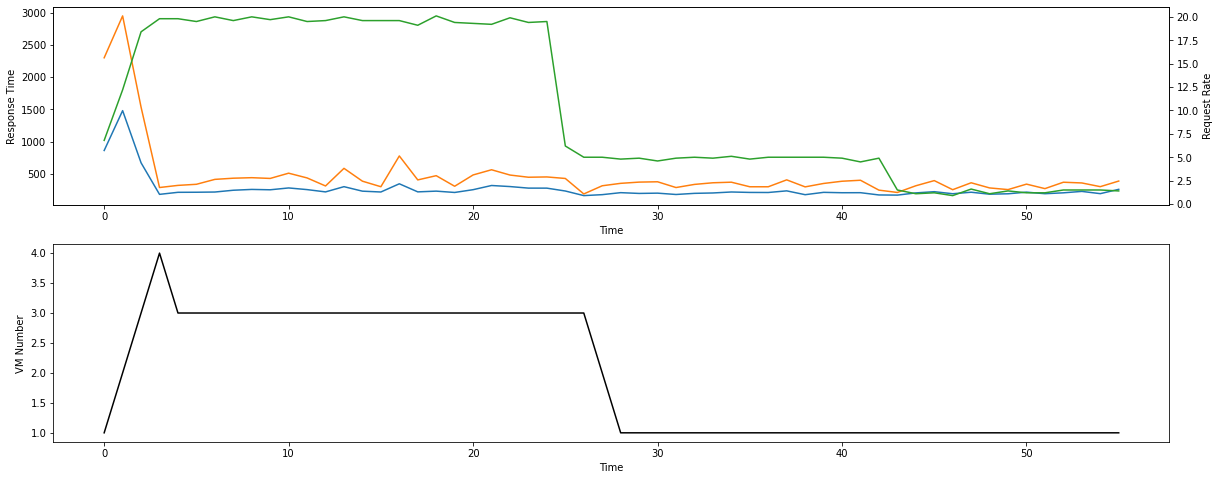

In [9]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

ax1.plot(df[' response_time'], color = 'C0')
ax1.plot(df[' response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df[' request_rate'], color = 'C2')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df[' worker_number'], color = 'black')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')

plt.show()

In [10]:
df.iloc[:, 0:5].describe()

,response_time_p95,response_time,worker_number,request_rate
count,56.000000,56.000000,56.000000,56.000000
mean,472.176560,262.842236,1.946429,10.289286
std,460.610213,198.866816,1.016583,8.053654
min,185.973900,160.303500,1.000000,0.900000
25%,303.945337,197.636500,1.000000,4.575000
50%,368.271850,213.396552,1.000000,5.000000
75%,431.537775,251.085698,3.000000,19.525000
max,2949.977150,1479.373516,4.000000,20.100000


In [11]:
df.columns

Index(['time', ' response_time_p95', ' response_time', ' worker_number',
       ' request_rate', 'CPU0User%', ' CPU0Idle%', ' CPU0Total%', ' CPU1User%',
       ' CPU1Idle%', ' CPU1Total%', '[DSK:sda]Reads', ' [DSK:sda]RMerge',
       ' [DSK:sda]RKBytes', ' [DSK:sda]WaitR', ' [DSK:sda]Writes',
       ' [DSK:sda]WMerge', ' [DSK:sda]WKBytes', ' [DSK:sda]WaitW',
       ' [DSK:sda]Request', ' [DSK:sda]QueLen', ' [DSK:sda]Wait',
       ' [DSK:sda]SvcTim', ' [DSK:sda]Util', '[NUMA:0]Used', ' [NUMA:0]Free',
       ' [NUMA:0]Slab', ' [NUMA:0]Mapped', ' [NUMA:0]Anon', ' [NUMA:0]AnonH',
       ' [NUMA:0]Inactive', ' [NUMA:0]Hits', '[TCPD]InReceives',
       ' [TCPD]InDelivers', ' [TCPD]OutRequests', ' [TCPD]InSegs',
       ' [TCPD]OutSegs'],
      dtype='object')

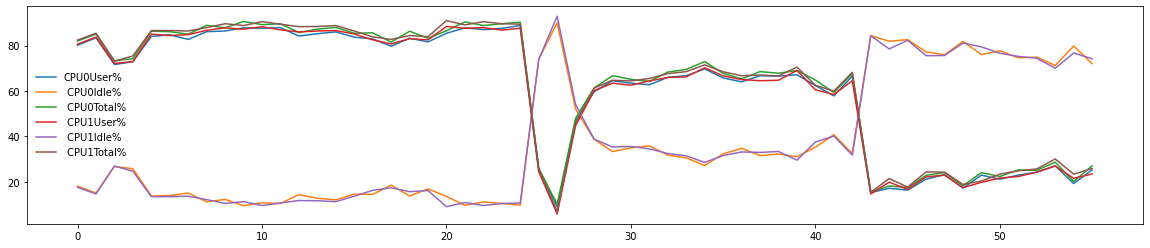

In [12]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
  if 'CPU' in col_name:
    plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [13]:
df.iloc[:, 5:11].describe()

,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,CPU1Total%
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,61.096429,37.158929,62.800000,61.166071,36.998214,62.944643
std,26.658248,26.976082,27.013256,26.998756,27.092418,27.148768
min,9.000000,9.400000,10.000000,5.800000,9.000000,6.900000
25%,26.625000,13.850000,28.200000,26.275000,13.400000,28.950000
50%,66.700000,31.250000,68.750000,66.400000,31.450000,68.450000
75%,84.050000,71.400000,86.150000,85.025000,70.950000,86.600000
max,88.800000,90.000000,90.600000,88.400000,92.900000,91.000000


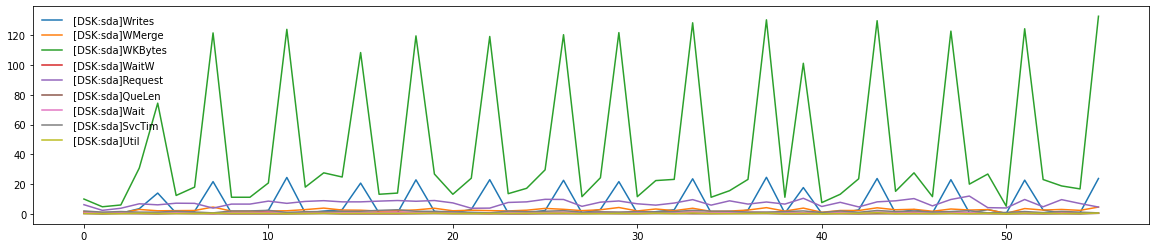

In [14]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
  if 'DSK' in col_name:
    if df[col_name].describe()[2] > 0:
      plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [15]:
df.iloc[:, 11:24].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,56.0,56.0,56.0,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.0,0.0,0.0,0.0,6.871429,2.596429,44.467857,0.814286,7.228571,0.094643,0.814286,1.567857,0.346429
std,0.0,0.0,0.0,0.0,9.394906,0.936719,46.251974,0.210133,2.067912,0.084034,0.210133,0.483212,0.133436
min,0.0,0.0,0.0,0.0,0.300000,0.400000,4.800000,0.300000,2.400000,0.000000,0.300000,0.700000,0.100000
25%,0.0,0.0,0.0,0.0,0.600000,2.000000,13.200000,0.700000,5.900000,0.000000,0.700000,1.200000,0.275000
50%,0.0,0.0,0.0,0.0,1.850000,2.500000,22.750000,0.800000,7.350000,0.100000,0.800000,1.600000,0.300000
75%,0.0,0.0,0.0,0.0,14.925000,3.100000,81.100000,0.925000,8.725000,0.100000,0.925000,1.900000,0.400000
max,0.0,0.0,0.0,0.0,24.600000,4.600000,132.800000,1.200000,12.000000,0.400000,1.200000,2.800000,0.800000


In [16]:
df.iloc[:, 24:32].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,5.600000e+01,56.000000,56.000000,56.000000,5.600000e+01,56.0,5.600000e+01,56.0
mean,3.462956e+06,567576.792857,209841.950000,232764.771429,1.220691e+06,0.0,1.093903e+06,100.0
std,2.131783e+04,21316.132895,4232.946109,1292.000756,2.176977e+03,0.0,1.908904e+04,0.0
min,3.452529e+06,455533.200000,180892.000000,224834.800000,1.216677e+06,0.0,1.058562e+06,100.0
25%,3.456991e+06,570934.400000,209678.800000,232719.100000,1.219645e+06,0.0,1.091110e+06,100.0
50%,3.458533e+06,571998.800000,210112.600000,232864.200000,1.220528e+06,0.0,1.091326e+06,100.0
75%,3.459598e+06,573541.000000,210507.100000,233205.400000,1.221244e+06,0.0,1.091660e+06,100.0
max,3.575007e+06,578002.800000,219762.800000,234536.800000,1.232452e+06,0.0,1.222702e+06,100.0


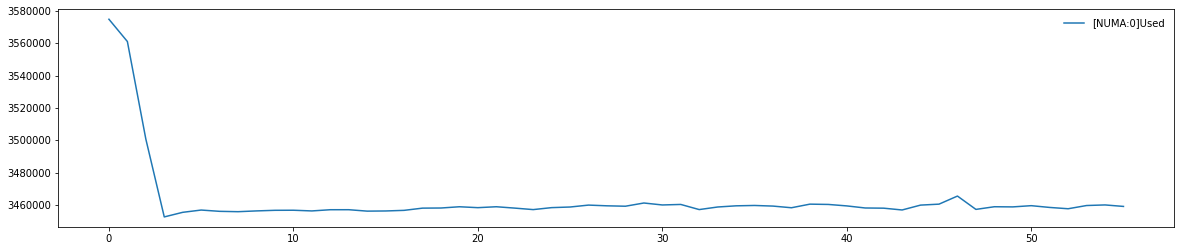

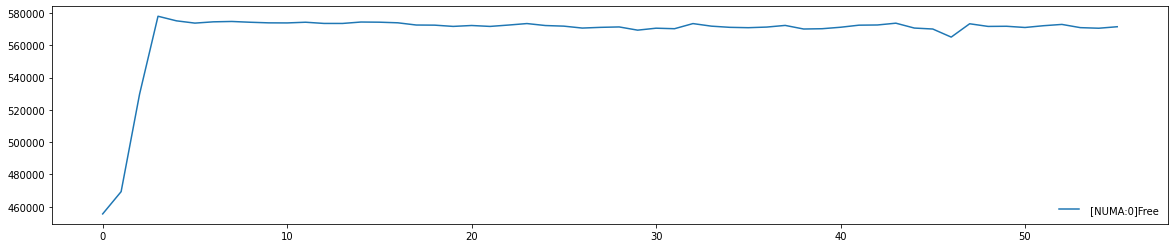

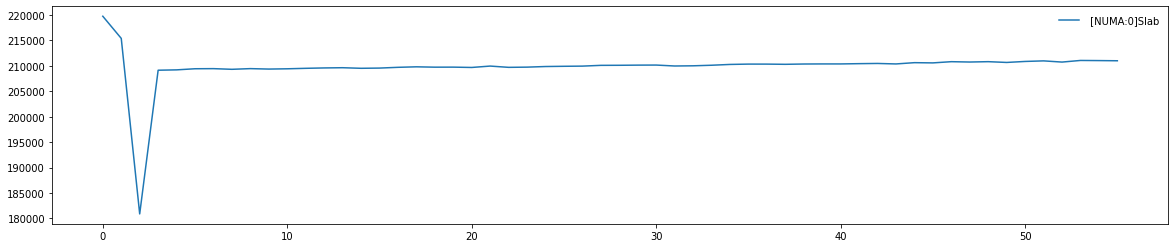

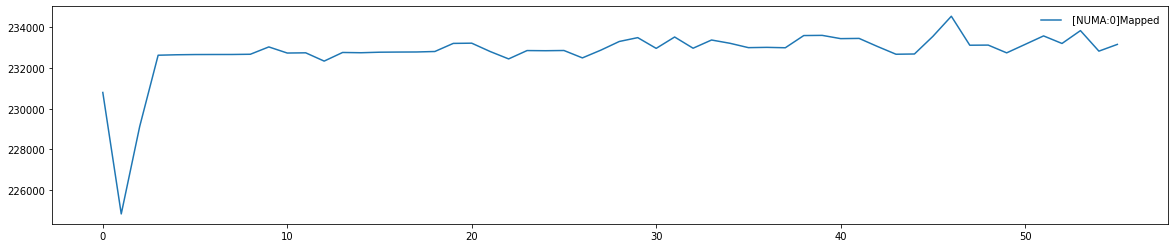

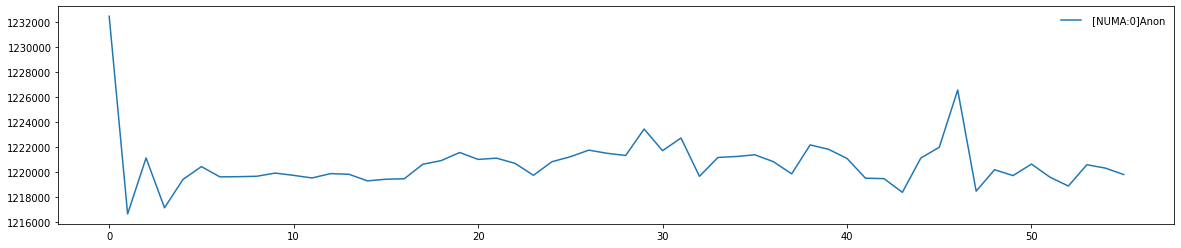

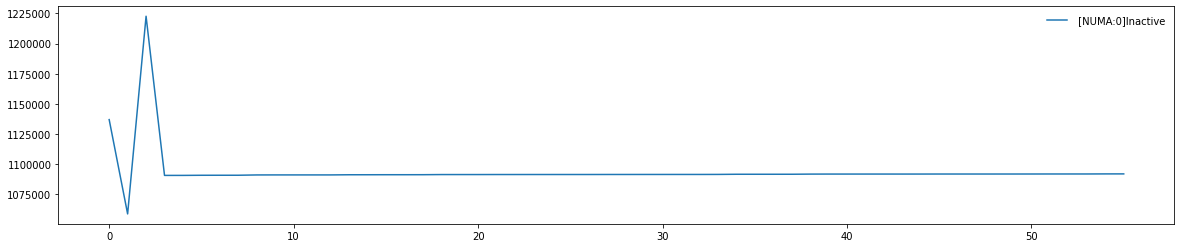

In [17]:
for col_name in df.columns:
  if 'NUMA' in col_name:
    if df[col_name].describe()[2] > 0:
      plt.figure(figsize=(20, 4))
      plt.ticklabel_format(useOffset=False)
      plt.ticklabel_format(style='plain')
      plt.plot(df[col_name], label = col_name)
      plt.legend(frameon=False)
      plt.show()

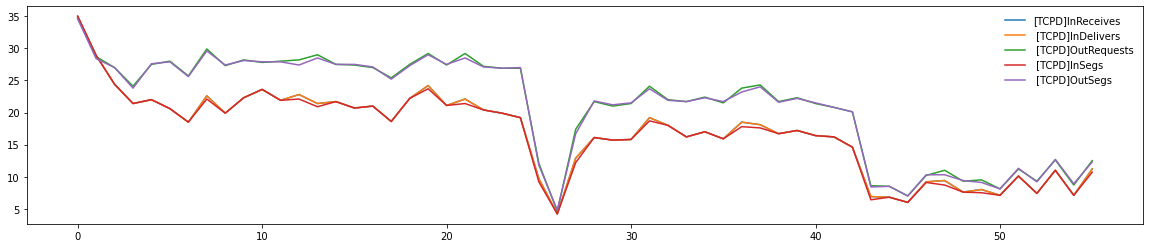

In [18]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
  if 'TCP' in col_name:
    if df[col_name].describe()[2] > 0:
      plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [19]:
rt_log_file_name  = 'Logs/Load2/metric_rt_threshold200_500.log'
cpu_log_file_name = 'Logs/Load2/metric_cpu_threshold40_70.log'

In [20]:
df_cpu = pd.read_csv(cpu_log_file_name, sep=',', header=0)

df_rt  = pd.read_csv(rt_log_file_name, sep=',', header=0)

In [21]:
print(df_cpu.count()[0])
print(df_rt.count()[0])

57
56


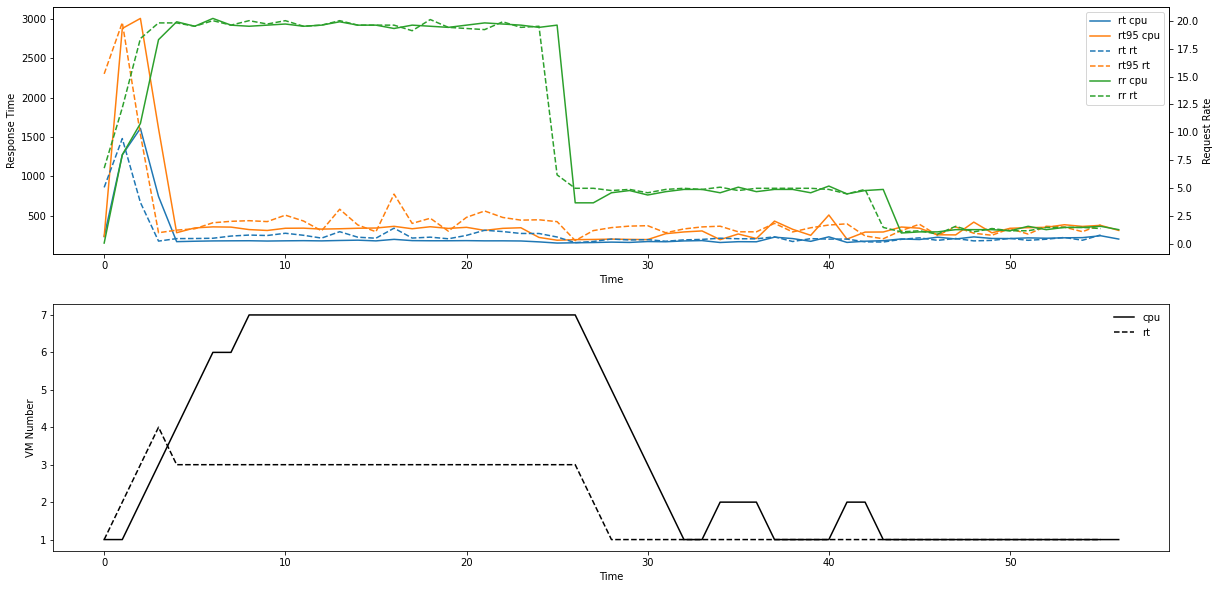

In [22]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns2 = ax1.plot(df_cpu[' response_time_p95'], color = 'C1', label = 'rt95 cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')
lns4 = ax1.plot(df_rt[' response_time_p95'], color = 'C1', linestyle = 'dashed', label = 'rt95 rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

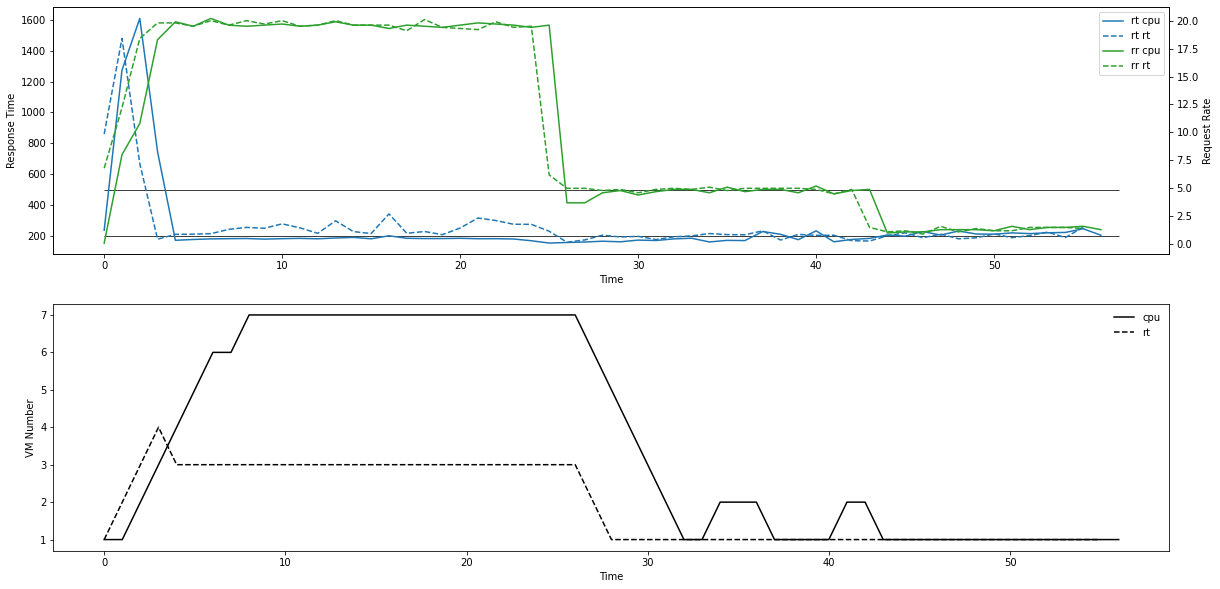

In [24]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns3+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

length = df_cpu[' response_time'].count()

ax1.hlines(500, 0, length, linewidth=0.75, color = 'black')
ax1.hlines(200, 0, length, linewidth=0.75, color = 'black')

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

In [25]:
# https://towardsdatascience.com/matplotlib-styles-for-scientific-plotting-d023f74515b4

# https://github.com/garrettj403/SciencePlots

# https://pypi.org/project/SciencePlots/

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


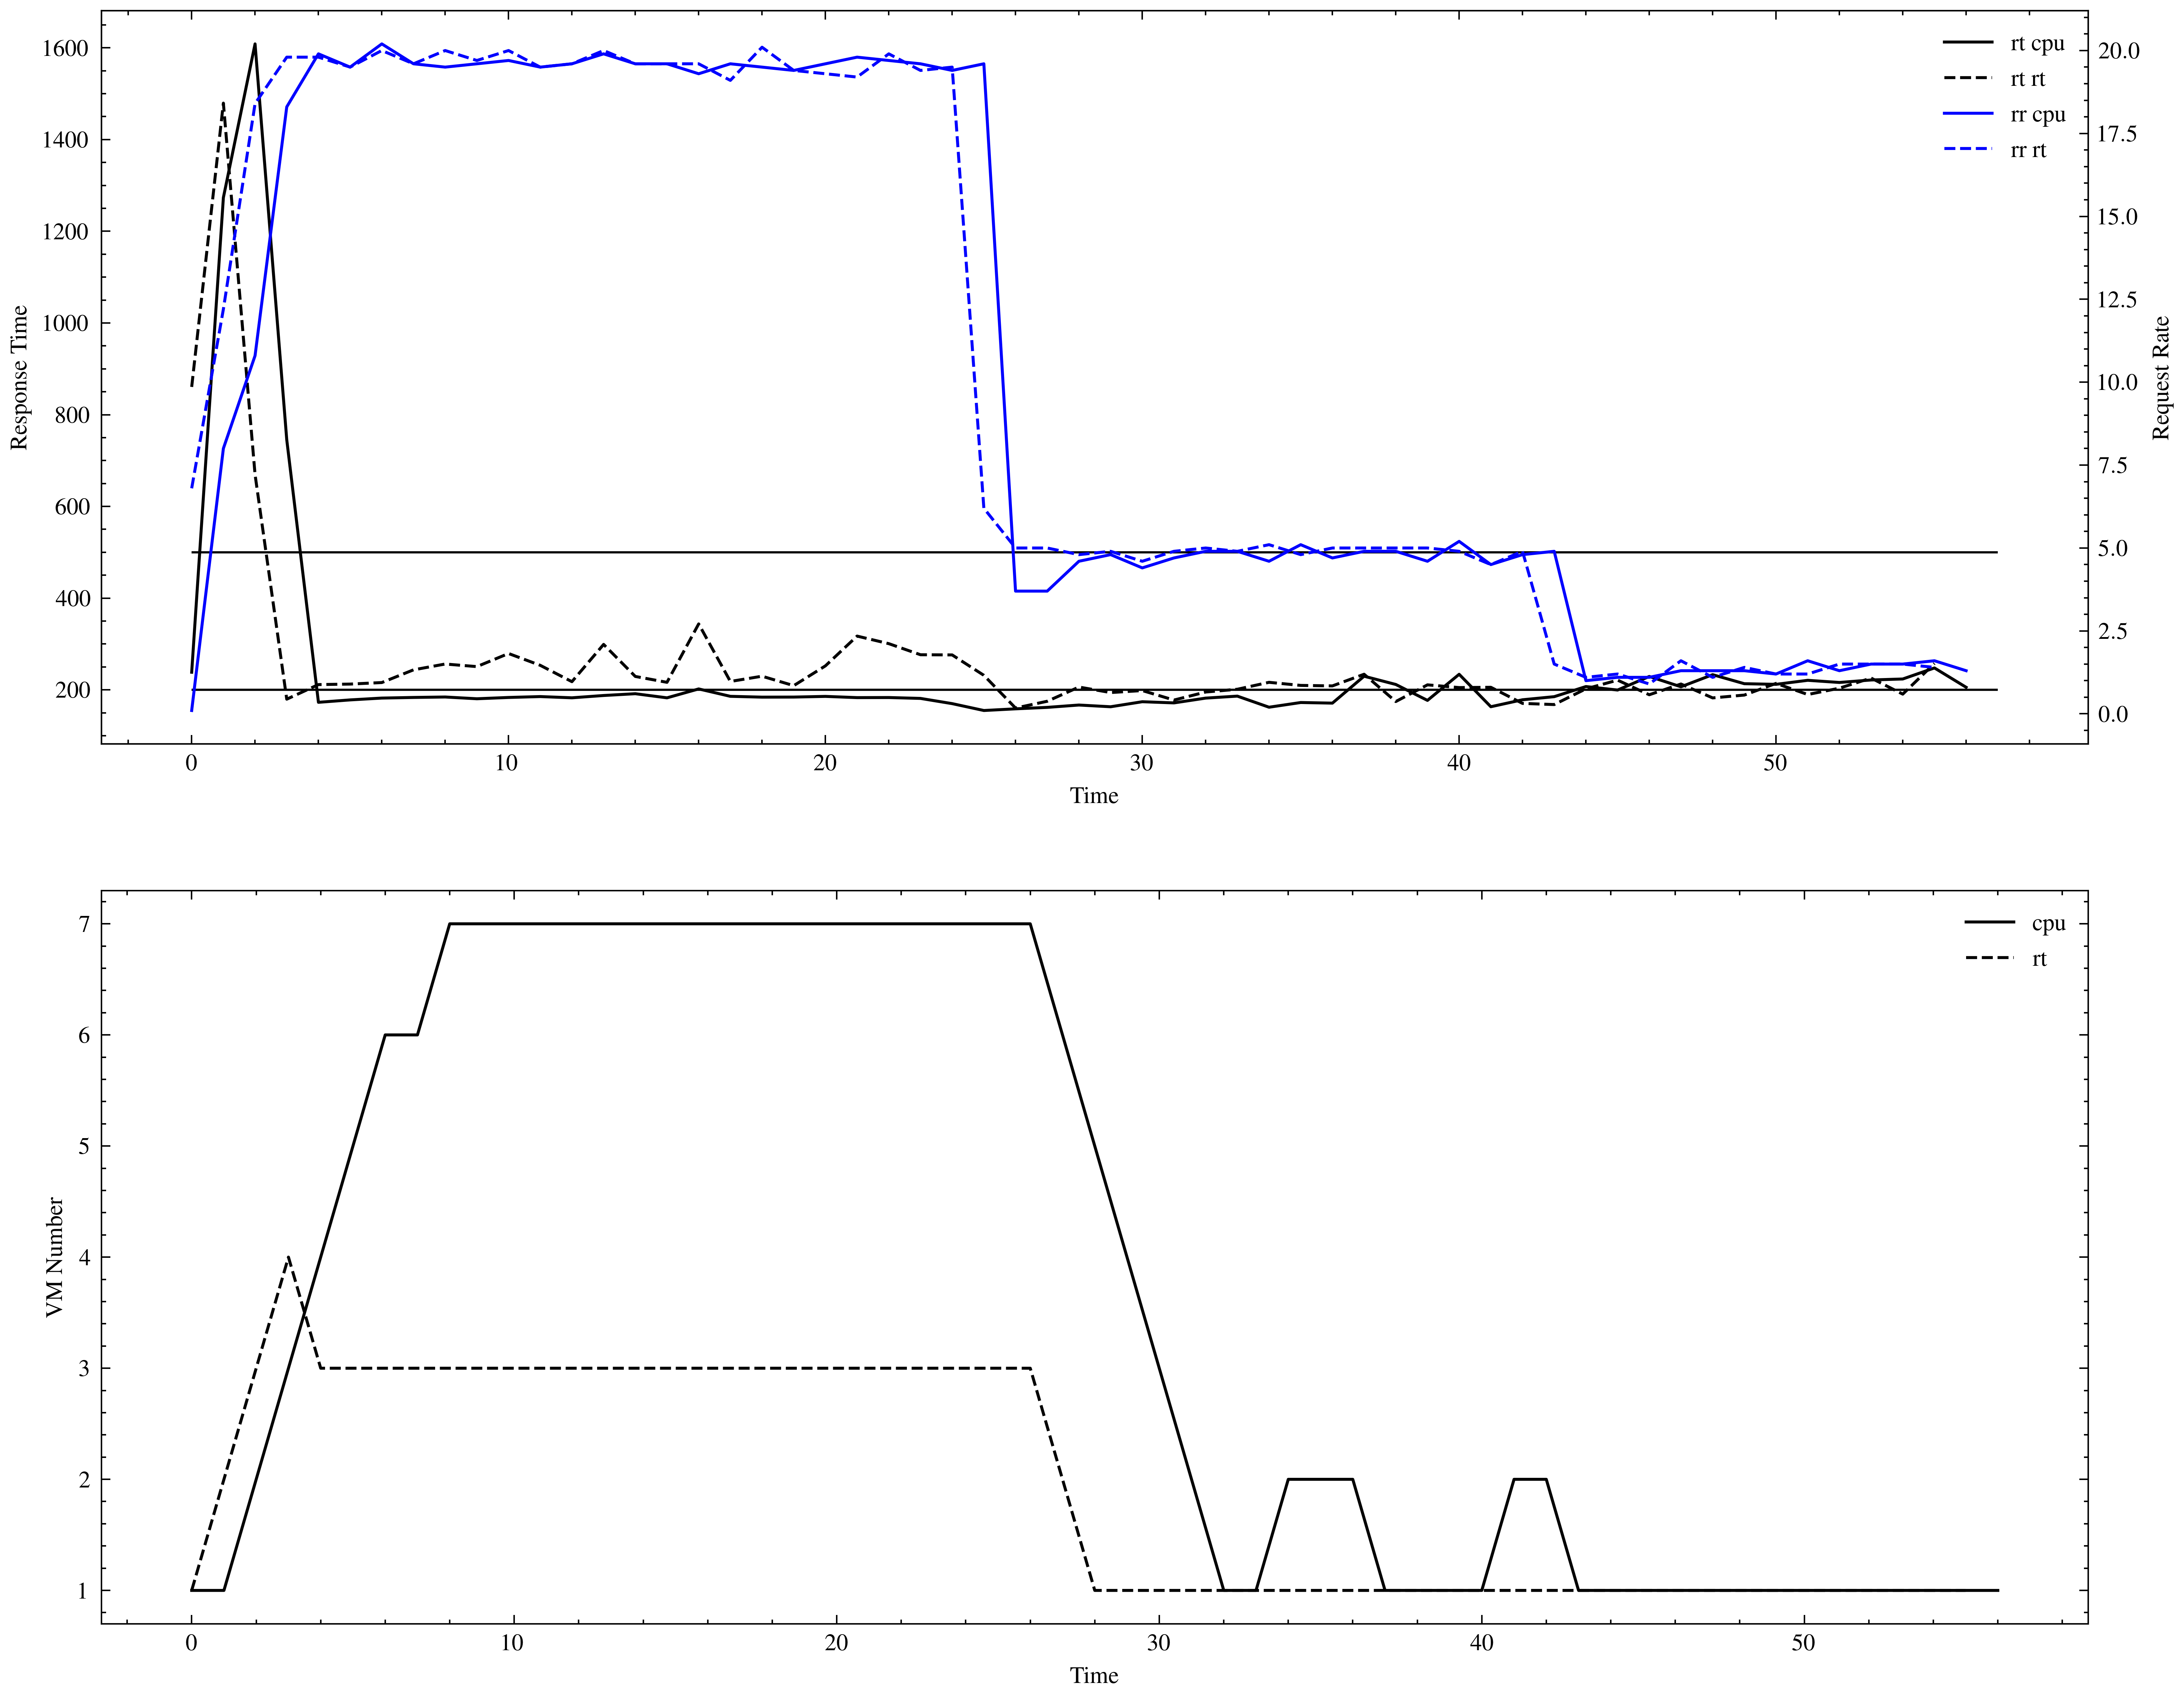

In [27]:
with plt.style.context(['science', 'ieee']):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 10))

    lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
    lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

    ax2 = ax1.twinx()

    lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
    lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

    # added these three lines
    lns = lns1+lns3+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    length = df_cpu[' response_time'].count()

    ax1.hlines(500, 0, length, linewidth=0.75, color = 'black')
    ax1.hlines(200, 0, length, linewidth=0.75, color = 'black')

    ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

    ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
    ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

    ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

    plt.show()

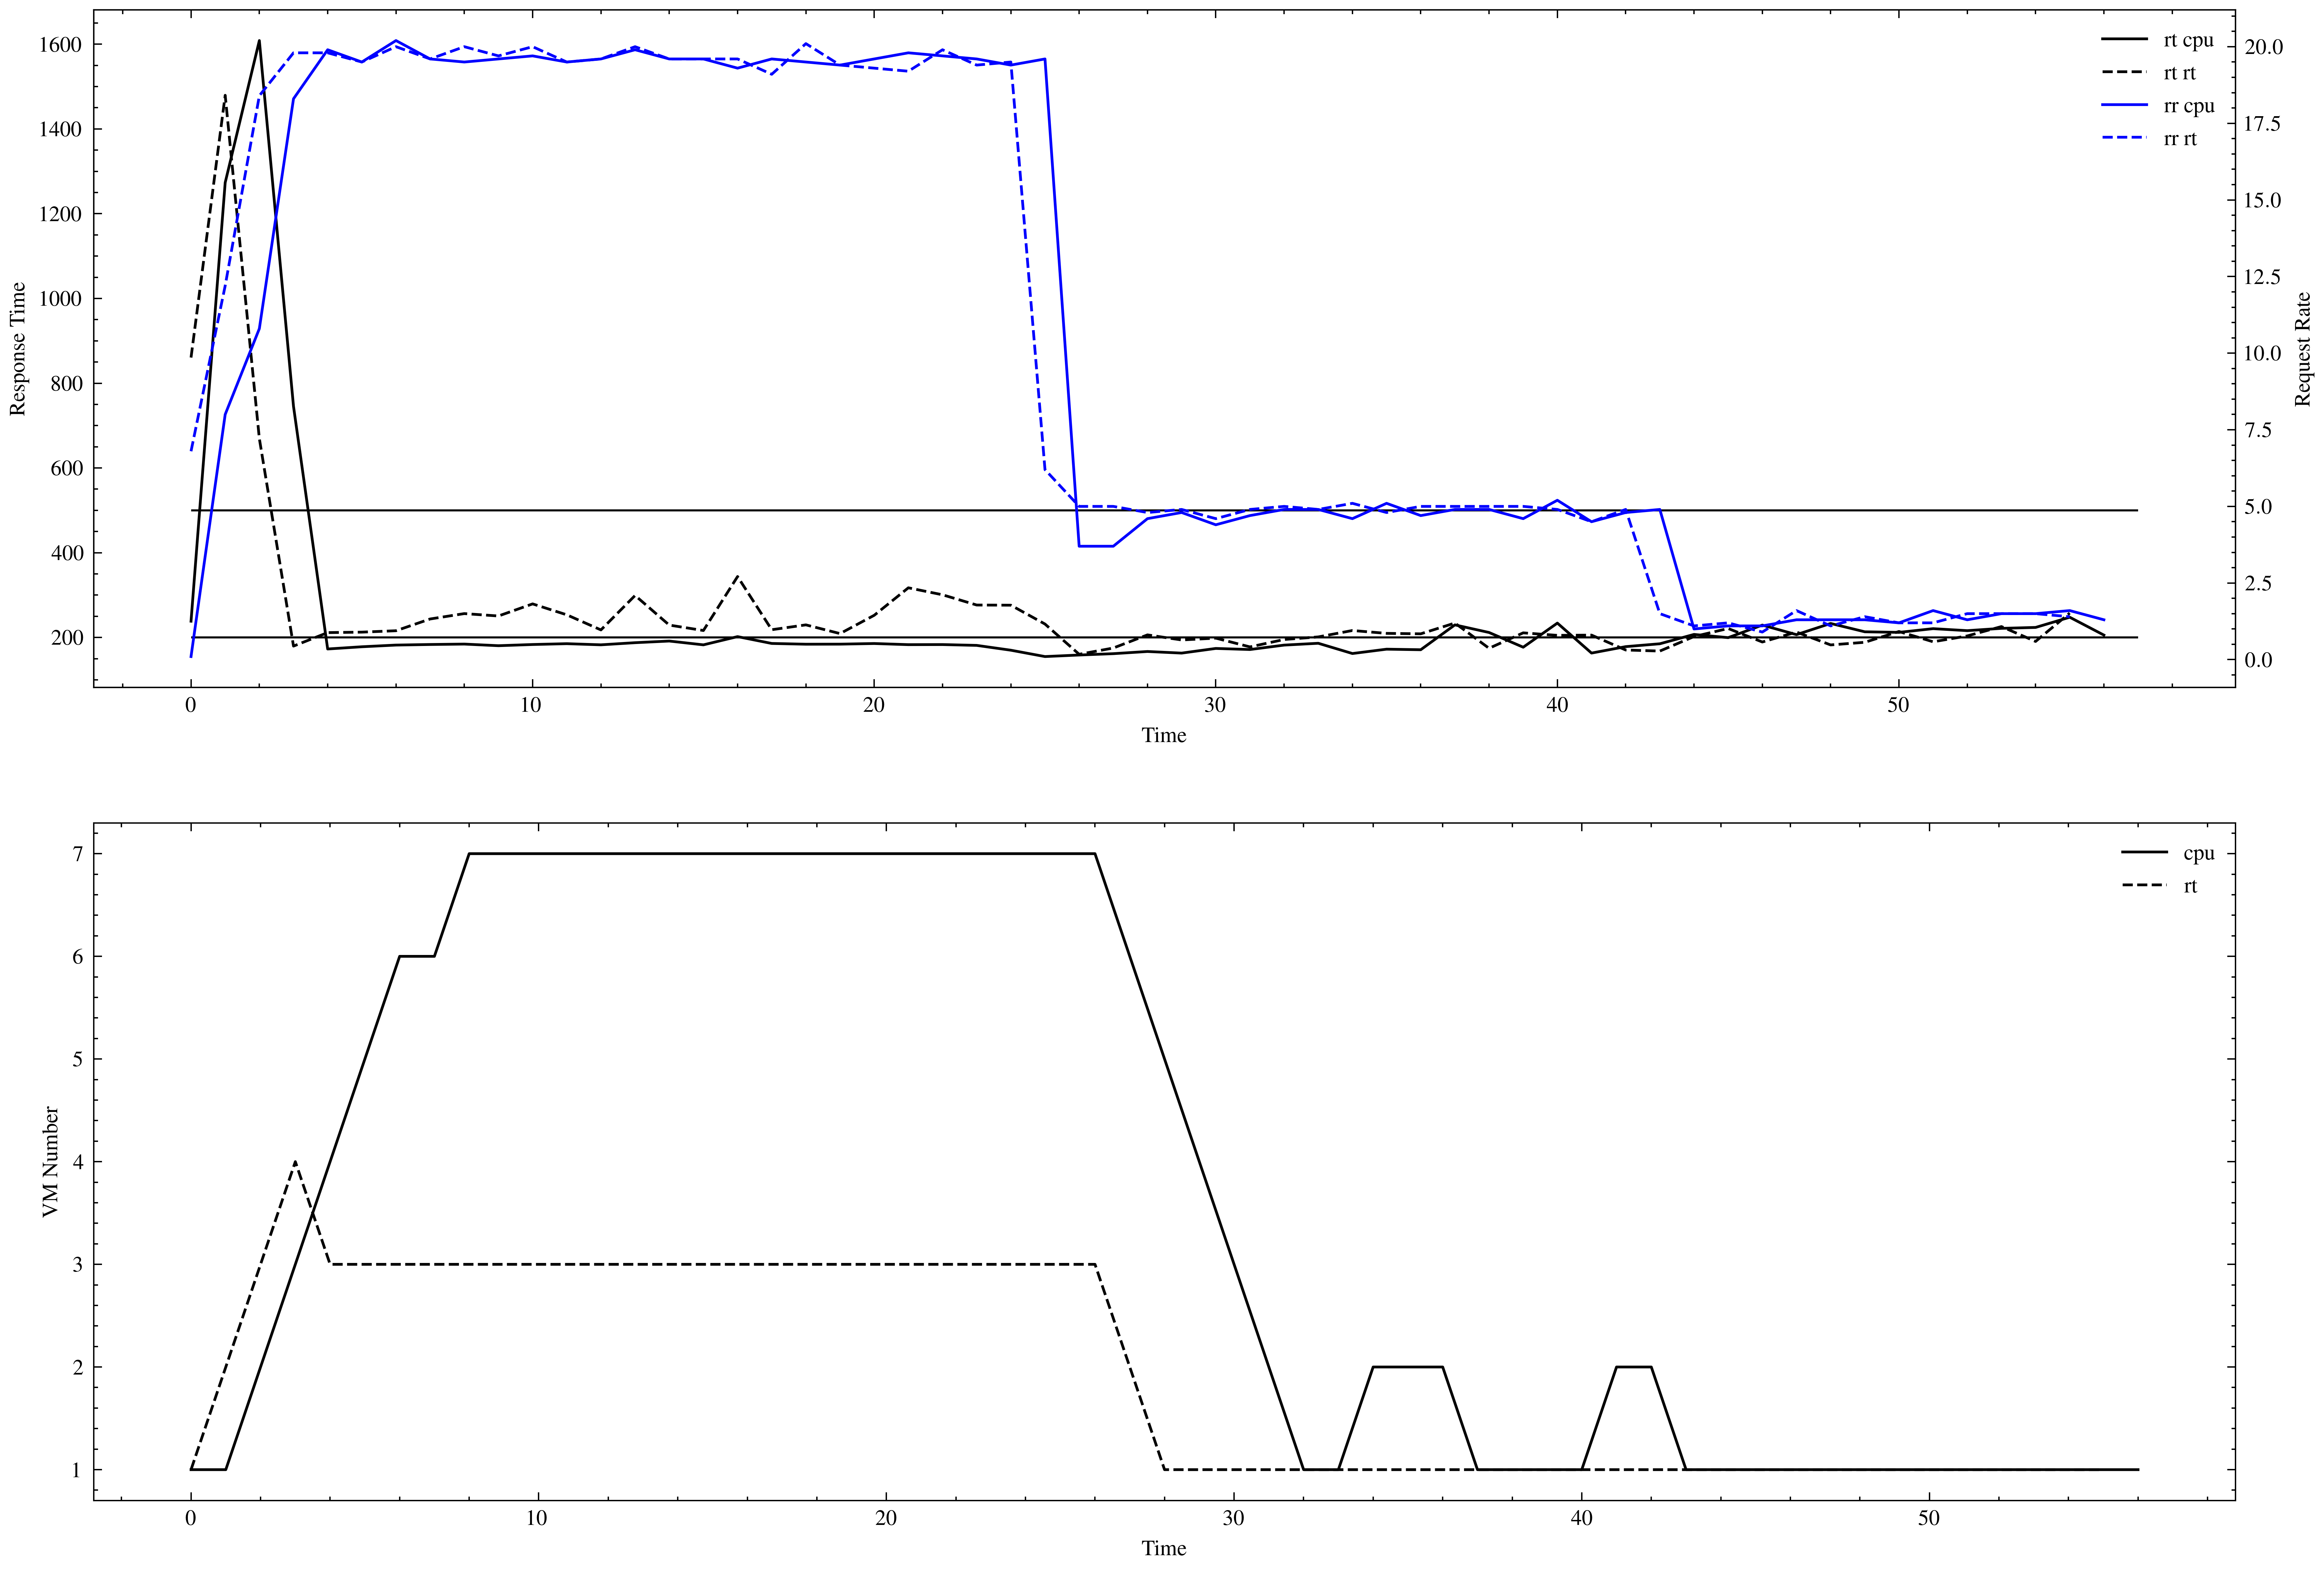

In [28]:
with plt.style.context(['science', 'ieee']):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(14, 10))

    lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
    lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

    ax2 = ax1.twinx()

    lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
    lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

    # added these three lines
    lns = lns1+lns3+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    length = df_cpu[' response_time'].count()

    ax1.hlines(500, 0, length, linewidth=0.75, color = 'black')
    ax1.hlines(200, 0, length, linewidth=0.75, color = 'black')

    ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');



    ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
    ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

    ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

    plt.show()

# Egy nagyon fontos cikk

Hogy kell a terhelést generálni illetve milyen különbségek vannak az egyes módszerekben.

https://techcommunity.microsoft.com/t5/testingspot-blog/simulating-targeted-throughput-for-load-testing-with-jmeter/ba-p/2227962

```megvan a megoldás

- infititre kell állítani a loopot
- be kell állítani az időt hogy mennyi ideig tartson
- egymás alá kell rakni a threadgruppokat
- be kell állítani a testplanbe, hogy folyamatosna kövessék egymást ne párhuzamosan
- minegyik treadgruppba be kell rakni ugyan azt a kérést

- modul controlt kell elhelyezni a threadgroupban
- kívül kell elhelyezni a kivánt oldalt és a requestet a testplan alatt
```

## CPU vs Response Time új 20req/sec terheléssel

Új JMeter terhelést raktam fel mert az összes korább rossz módszert követ.

Nem volt fix a terhelési görbe, itt most már az.

In [29]:
rt_log_file_name  = 'Logs/Load2/metric_rt_threshold200_500.log'
cpu_log_file_name = 'Logs/Load2/metric_cpu_threshold40_70.log'

In [30]:
df_cpu = pd.read_csv(cpu_log_file_name, sep=',', header=0)

df_rt  = pd.read_csv(rt_log_file_name, sep=',', header=0)

In [31]:
print(df_cpu.count()[0])
print(df_rt.count()[0])

57
56


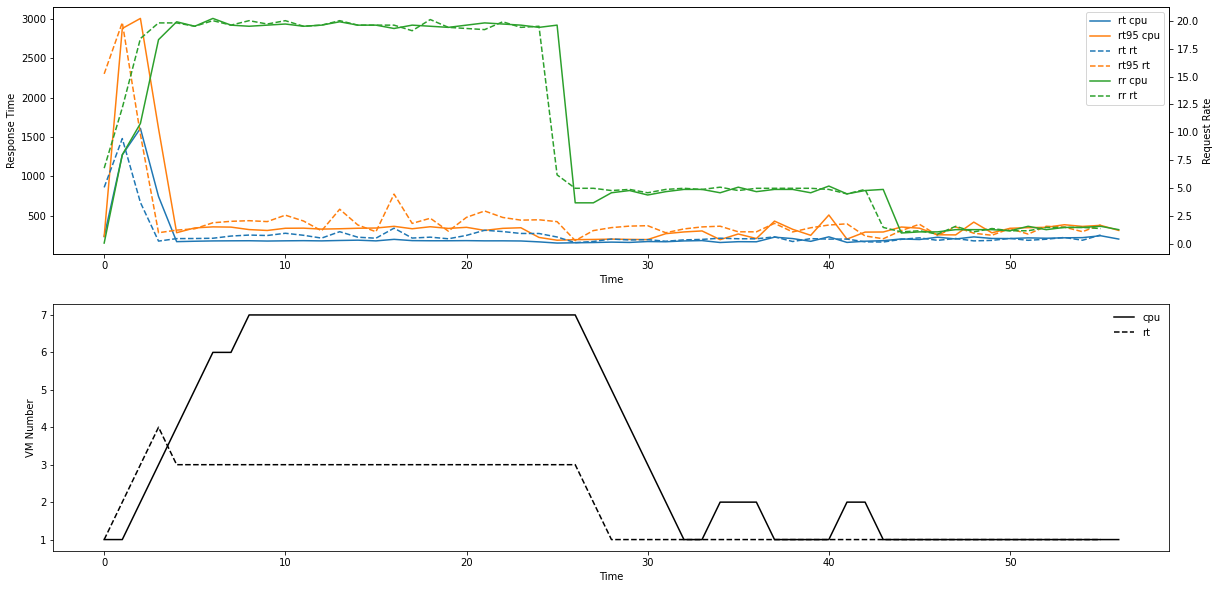

In [32]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns2 = ax1.plot(df_cpu[' response_time_p95'], color = 'C1', label = 'rt95 cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')
lns4 = ax1.plot(df_rt[' response_time_p95'], color = 'C1', linestyle = 'dashed', label = 'rt95 rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

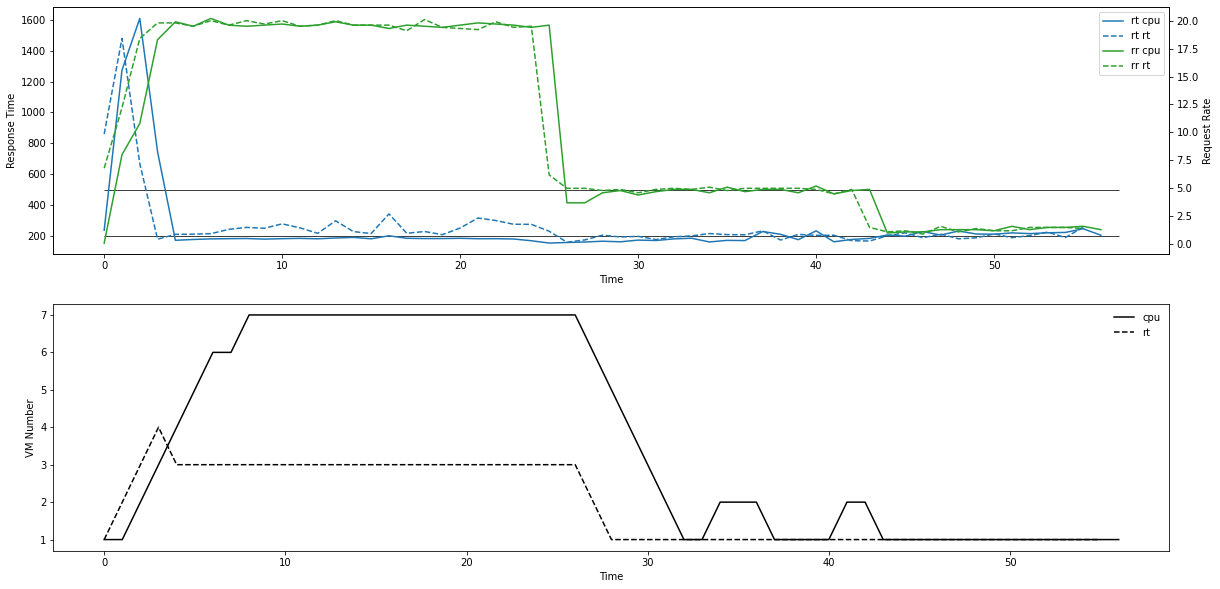

In [33]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns3+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

length = df_cpu[' response_time'].count()

ax1.hlines(500, 0, length, linewidth=0.75, color = 'black')
ax1.hlines(200, 0, length, linewidth=0.75, color = 'black')

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

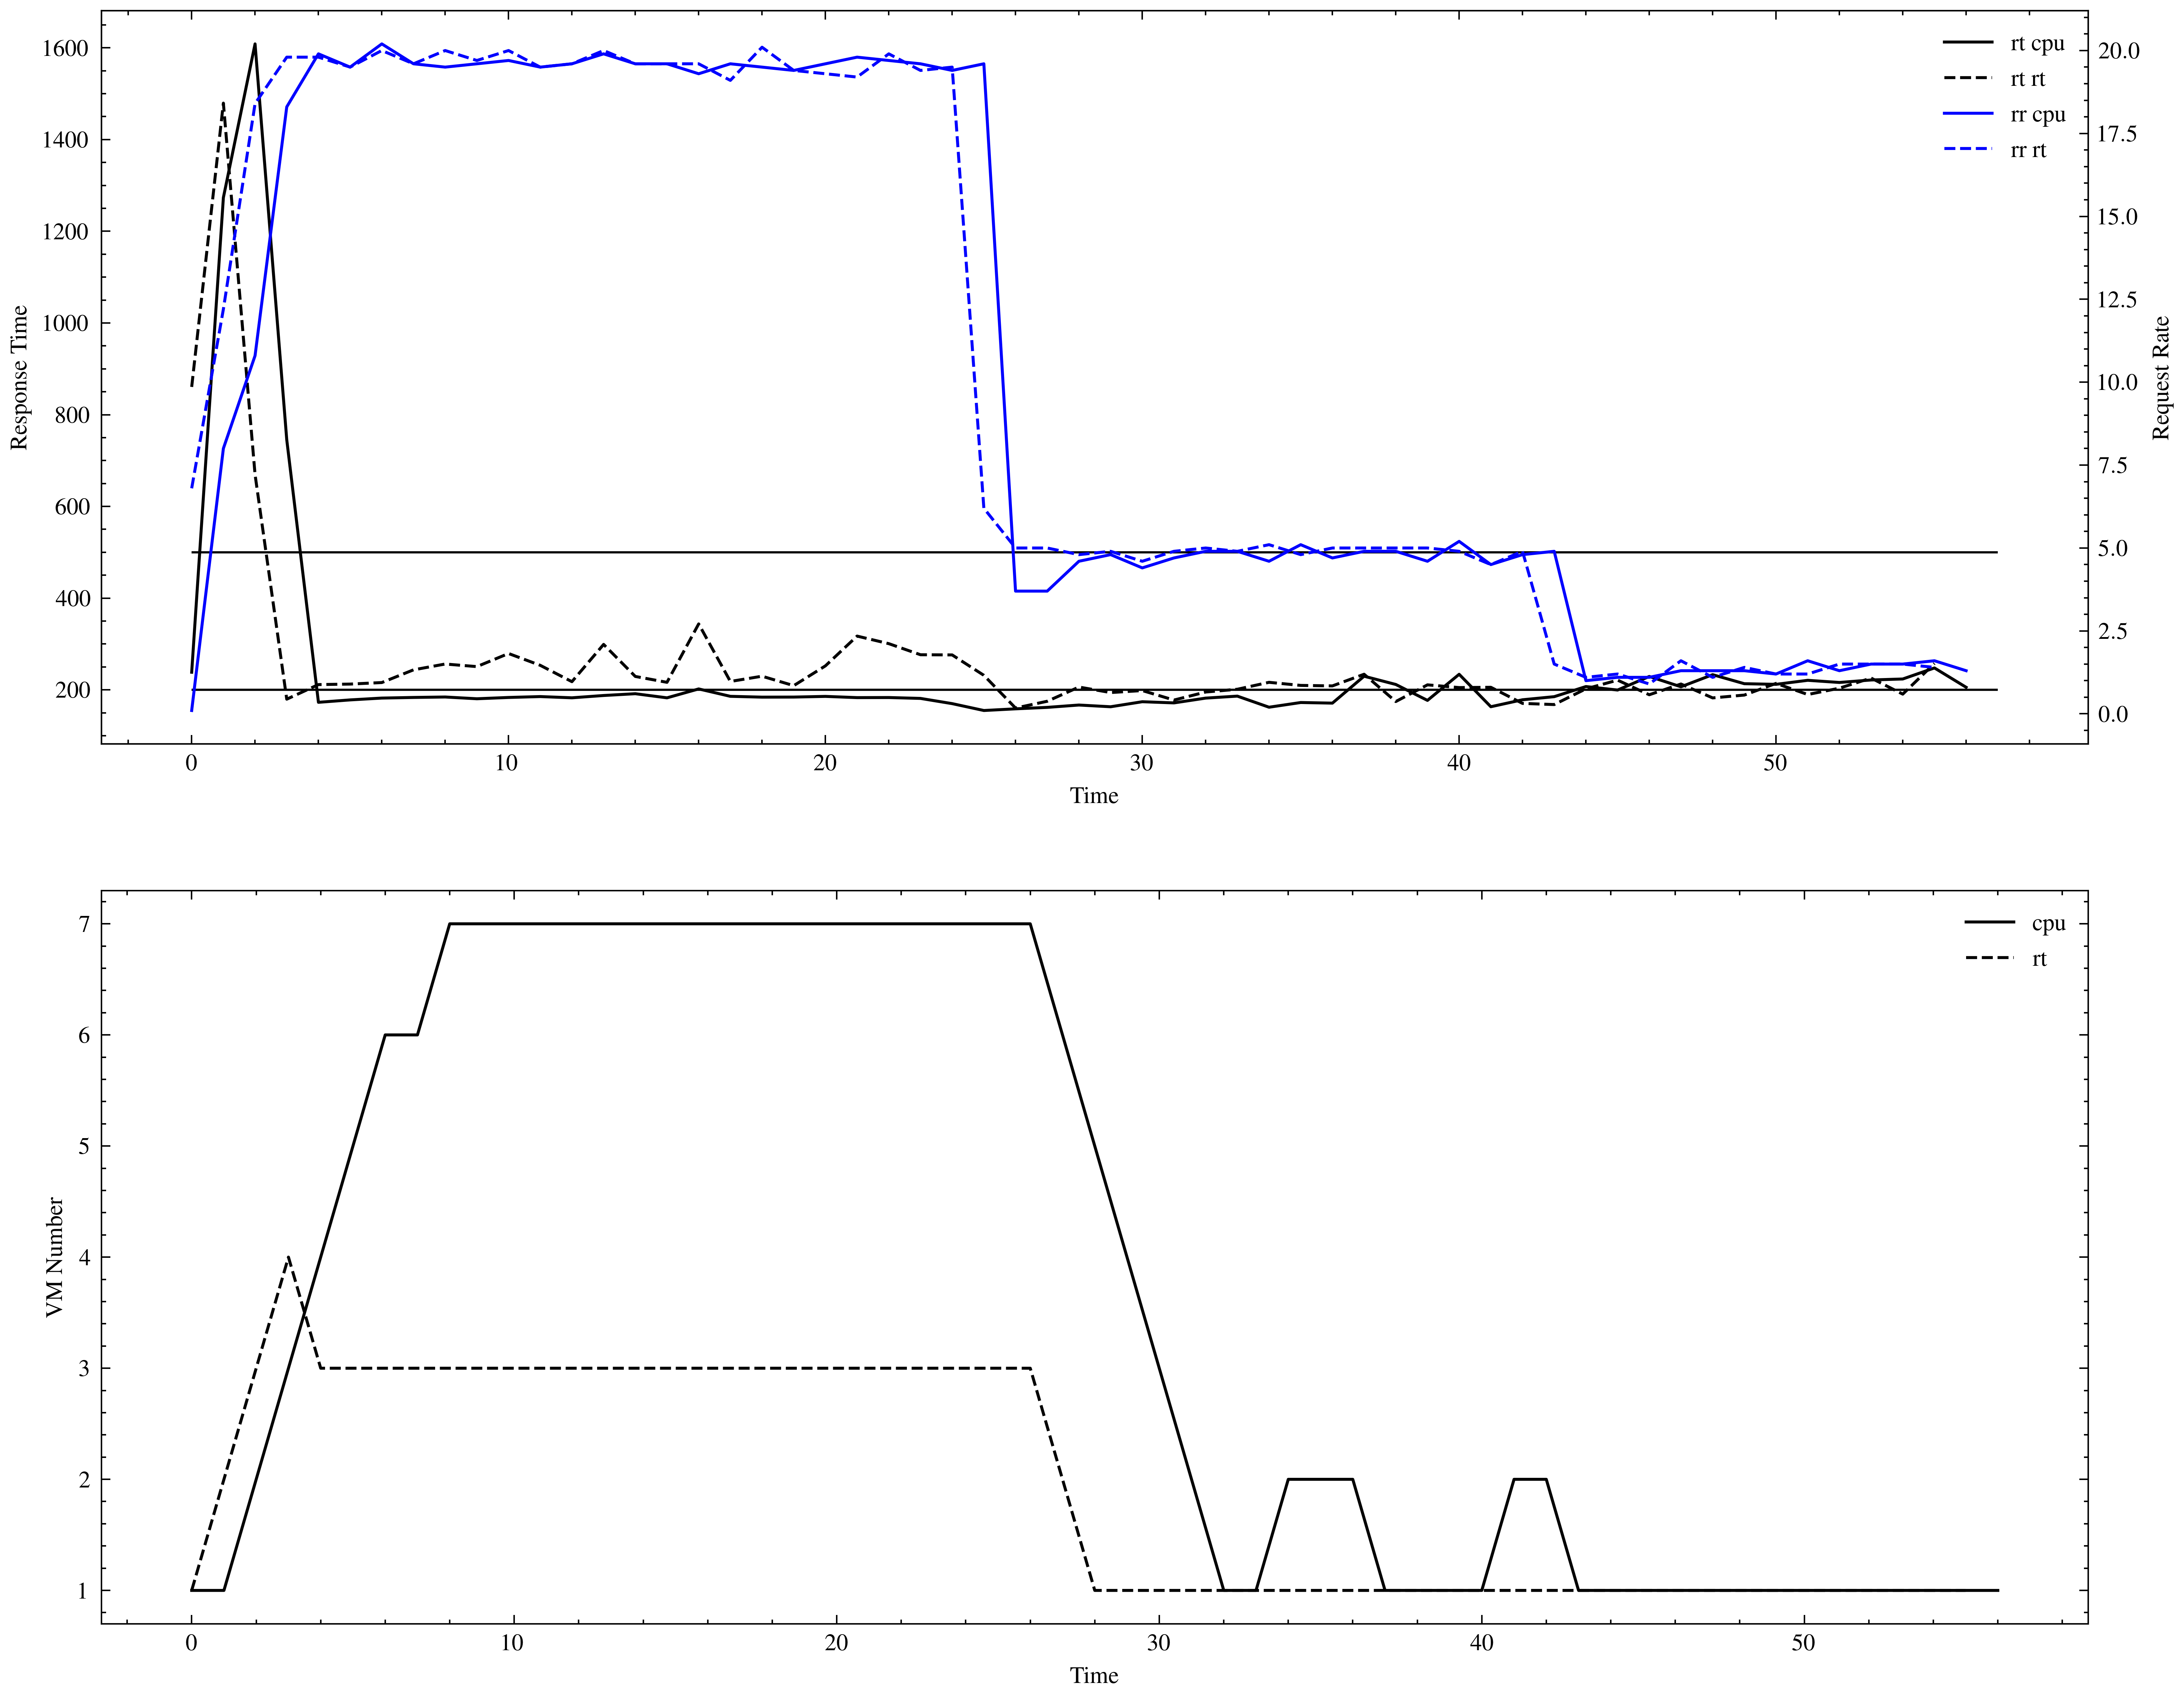

In [34]:
with plt.style.context(['science', 'ieee']):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 10))

    lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
    lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

    ax2 = ax1.twinx()

    lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
    lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

    # added these three lines
    lns = lns1+lns3+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    length = df_cpu[' response_time'].count()

    ax1.hlines(500, 0, length, linewidth=0.75, color = 'black')
    ax1.hlines(200, 0, length, linewidth=0.75, color = 'black')

    ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');

    ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
    ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

    ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

    plt.show()